In [12]:
import os
sep = os.sep
import numpy as np

In [13]:
file = '02_test.tif'

In [14]:
CONF = {
    'Dirs': {
        'image': 'data' + sep + 'DRIVE' + sep + 'images',
        'mask': 'data' + sep + 'DRIVE' + sep + 'mask',
        'truth': 'data' + sep + 'DRIVE' + sep + 'manual',
        'logs': 'LOGS_2019' + sep + 'DRIVE',
        'splits_json': 'data' + sep + 'DRIVE' + sep + 'splits'
    },

    'Funcs': {
        'truth_getter': lambda file_name: file_name.split('_')[0] + '_manual1.gif',
        'mask_getter': lambda file_name: file_name.split('_')[0] + '_mask.gif',
    }
}

In [15]:
from PIL import Image as IMG
from utils import img_utils as iu
from utils.img_utils import Image

In [16]:
file = '01_test'
image = Image()

In [17]:
image.load_file(CONF['Dirs']['image'], file+'.tif')
image.load_ground_truth(CONF['Dirs']['truth'], CONF['Funcs']['truth_getter'])
image.load_mask(CONF['Dirs']['mask'], CONF['Funcs']['mask_getter'])

In [20]:
seg_file = 'pred_' + file + '.png'
image.u_1_1 = np.array(IMG.open(CONF['Dirs']['logs'] + sep + 'UNET_1_1' + sep + seg_file))
image.u_1_100 = np.array(IMG.open(CONF['Dirs']['logs'] + sep + 'UNET_1_100_1' + sep + seg_file))

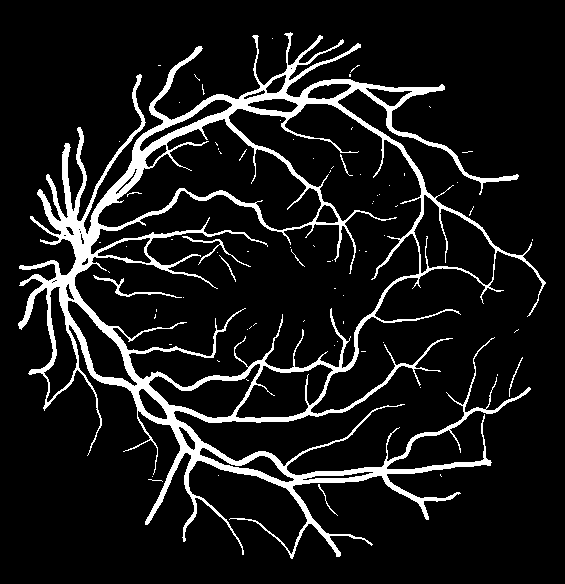

In [21]:
IMG.fromarray(image.u_1_100)

In [22]:
from sklearn.metrics import f1_score

In [23]:
image.u_1_1[image.u_1_1==255] = 1
image.u_1_100[image.u_1_100==255] = 1

In [61]:
f1_score(image.ground_truth, image.u_1_100, average='micro')

0.8325436707346255

In [25]:
from scipy.ndimage.morphology import distance_transform_edt

In [43]:
seg =image.u_1_100.copy()
seg[seg==255] = 1
edt_seg = distance_transform_edt(seg)
edt1 = edt_seg/np.max(edt_seg) * 255

In [31]:
gt = image.ground_truth.copy()
gt[gt==255] = 1
edt_gt = distance_transform_edt(gt)
edt = edt_gt/np.max(edt_gt) * 255
# edt_orig[edt_orig>=2] = 0

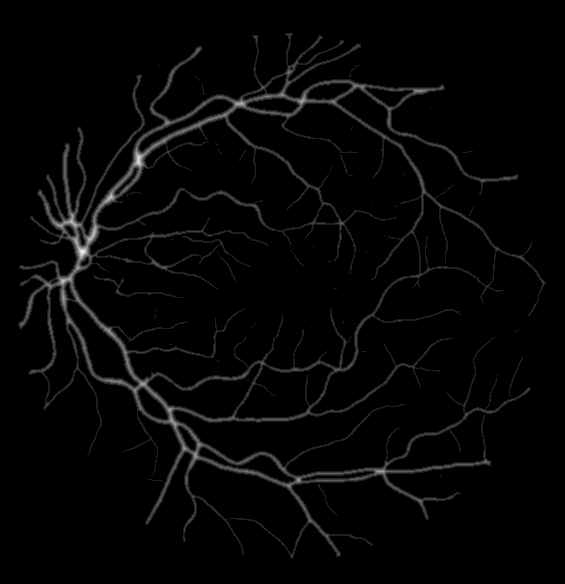

In [38]:
IMG.fromarray(np.array(edt1, dtype=np.uint8))

In [44]:
f1_score(gt.flatten(), image.u_1_100.flatten(), average='micro',\
         sample_weight=edt_seg.flatten())

0.8563469429593709

In [148]:
min(1, 2,3)

1

In [24]:
edt_orig.flatten().shape

(329960,)

In [116]:
a

{'one': 1, 'two': 2, '333': 3}

In [117]:
ig = '19_test.tif'

In [119]:
data = np.array(IMG.open(ig))

In [121]:
data.shape

(584, 565, 3)

In [136]:
p = 0.8278
r = 0.8200
f1 = (2*p*r)/(p+r)

In [533]:
x = np.linspace(0.01,1, 100)
y = x/np.sum(x)
y.sum()

1.0000000000000002

In [560]:
xy = 0
yx = 0
eq = 0
X1, Y1 = [], []
for i in range(1000):
    x, y = np.random.gamma(1, 10, 2)
    
    
    X1.append(x), Y1.append(y)
#     print(x, '  ', y)
    if x> y:
        xy+=1
    elif x<y:
        yx+=1
    else:
        eq+=1
print(xy, yx, eq)

483 517 0


In [561]:
X1 = np.array(X1)
Y1 = np.array(Y1)
np.std(X1), np.std(Y1)

(9.674903158927098, 10.026538328755395)

In [562]:
import matplotlib.pyplot as plt

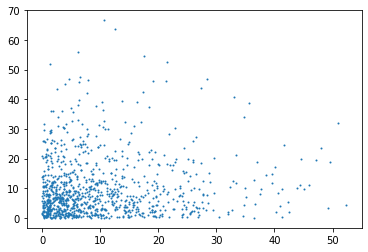

In [563]:
plt.scatter(X1, Y1, s=1)
plt.show()

In [554]:
np.random.gamma(1, 10, 2)

array([10.12946099, 36.03839505])

In [564]:
assert(1==3), 'False bro'

AssertionError: False bro

In [565]:
import torch